In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400
2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400
2016-01-15,21.899799,22.030572,21.500720,21.690113,319335600
2016-01-19,21.793833,22.242516,21.532288,22.188404,212350800
2016-01-20,21.823145,22.138802,21.063314,21.442102,289337600
...,...,...,...,...,...
2026-01-07,260.329987,263.679993,259.809998,263.200012,48309800
2026-01-08,259.040009,259.290009,255.699997,257.019989,50419300


In [3]:
df = df.droplevel(1,axis=1)

In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400
2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400
2016-01-15,21.899799,22.030572,21.500720,21.690113,319335600
2016-01-19,21.793833,22.242516,21.532288,22.188404,212350800
2016-01-20,21.823145,22.138802,21.063314,21.442102,289337600


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Date,,,,,
2026-01-07,260.329987,263.679993,259.809998,263.200012,48309800
2026-01-08,259.040009,259.290009,255.699997,257.019989,50419300
2026-01-09,259.369995,260.209991,256.220001,259.079987,39997000
2026-01-12,260.250000,261.299988,256.799988,259.160004,45207100
2026-01-13,260.690002,261.809998,258.390015,258.720001,15392535


## Data Exploration & Visualization

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(2515, 5)

In [8]:
df.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [9]:
df.describe() # statistical overview of dataframe

Price,Close,High,Low,Open,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,115.018482,116.158730,113.765625,114.911519,1.011653e+08
std,73.649120,74.350098,72.881271,73.584226,5.746374e+07
min,20.604080,20.907414,20.405658,20.526533,1.539254e+07
25%,41.640007,41.998331,41.384039,41.638842,6.120630e+07
50%,121.301910,122.555559,119.579439,121.162170,8.853050e+07
75%,171.977341,173.562146,170.584027,171.821185,1.238342e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [10]:
df.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400
2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400
2016-01-15,21.899799,22.030572,21.500720,21.690113,319335600
2016-01-19,21.793833,22.242516,21.532288,22.188404,212350800
2016-01-20,21.823145,22.138802,21.063314,21.442102,289337600


In [12]:
df = df.reset_index()

In [13]:
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400
1,2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400
2,2016-01-15,21.899799,22.030572,21.500720,21.690113,319335600
3,2016-01-19,21.793833,22.242516,21.532288,22.188404,212350800
4,2016-01-20,21.823145,22.138802,21.063314,21.442102,289337600


Text(0, 0.5, 'Close Price')

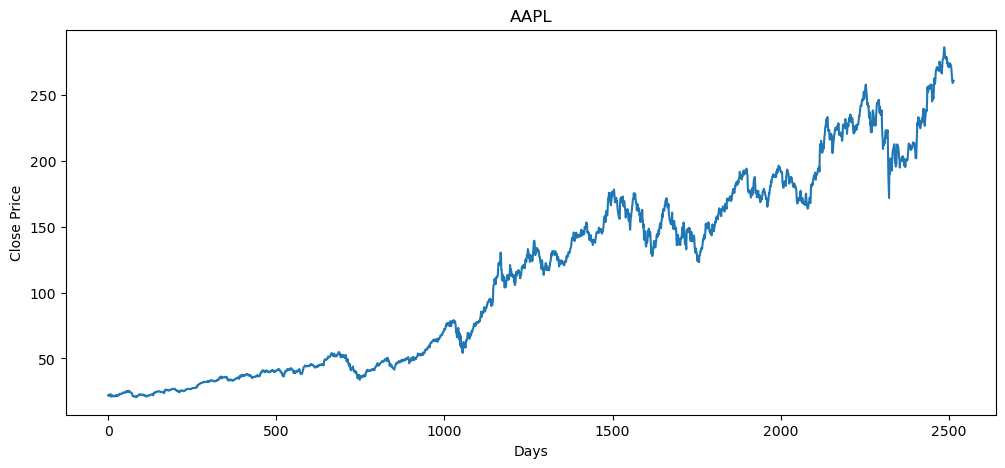

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

## Feature Engineering (new feature from Existing data)

### 100 days moving average

In [15]:
df['MA_100'] = df['Close'].rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
0,2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400,NaN
1,2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400,NaN
2,2016-01-15,21.899799,22.030572,21.500720,21.690113,319335600,NaN
3,2016-01-19,21.793833,22.242516,21.532288,22.188404,212350800,NaN
4,2016-01-20,21.823145,22.138802,21.063314,21.442102,289337600,NaN


In [16]:
df.head(108)

Price,Date,Close,High,Low,Open,Volume,MA_100
0,2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400,NaN
1,2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400,NaN
2,2016-01-15,21.899799,22.030572,21.500720,21.690113,319335600,NaN
3,2016-01-19,21.793833,22.242516,21.532288,22.188404,212350800,NaN
4,2016-01-20,21.823145,22.138802,21.063314,21.442102,289337600,NaN
...,...,...,...,...,...,...,...
103,2016-06-10,22.540415,22.659012,22.460590,22.471992,126851600,22.719659
104,2016-06-13,22.200584,22.606555,22.145847,22.508484,152082000,22.723433
105,2016-06-14,22.227949,22.460584,22.066018,22.196019,127727600,22.728586
106,2016-06-15,22.154970,22.444623,22.129882,22.310060,117780800,22.721465


In [17]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_100'], dtype='object', name='Price')

Text(0, 0.5, 'Close Price')

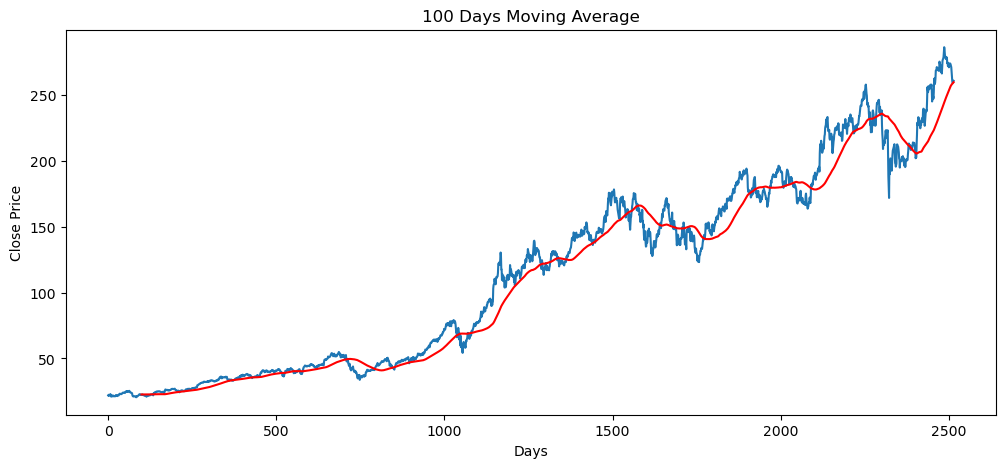

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')

### 200 days moving average

In [19]:
df['MA_200'] = df['Close'].rolling(200).mean()

In [20]:
df.head(230)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400,NaN,NaN
1,2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400,NaN,NaN
2,2016-01-15,21.899799,22.030572,21.500720,21.690113,319335600,NaN,NaN
3,2016-01-19,21.793833,22.242516,21.532288,22.188404,212350800,NaN,NaN
4,2016-01-20,21.823145,22.138802,21.063314,21.442102,289337600,NaN,NaN
...,...,...,...,...,...,...,...,...
225,2016-12-02,25.330339,25.374130,25.088329,25.162084,106112000,25.158065,23.949858
226,2016-12-05,25.148262,25.360308,24.950044,25.353394,137298000,25.184235,23.965789
227,2016-12-06,25.341879,25.436379,25.166711,25.238161,104782000,25.212364,23.985171
228,2016-12-07,25.590803,25.627682,25.159796,25.182845,119994800,25.240587,24.004199


Text(0, 0.5, 'Close Price')

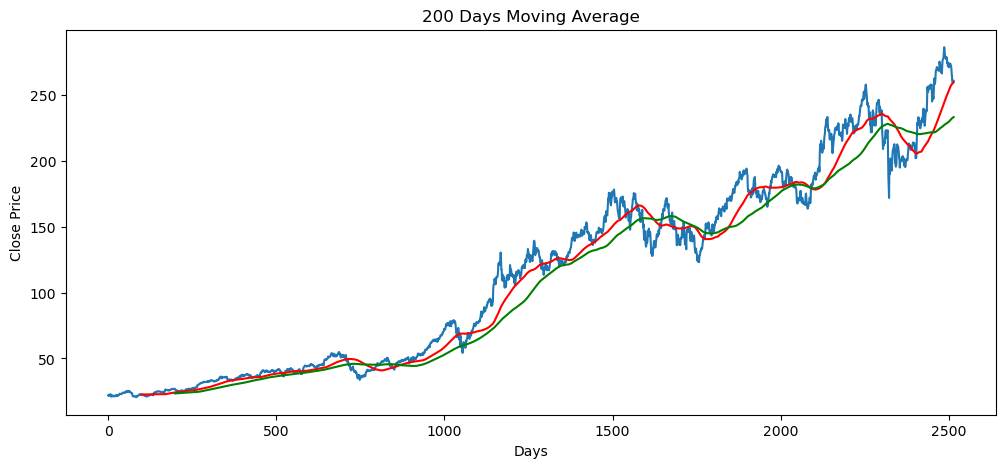

In [21]:
plt.figure(figsize=(12,5))

plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')

plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')

## calculating % changed in each trading session

In [22]:
df['Percentage Changed'] = df.Close.pct_change()

In [23]:
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
0,21.958422,NaN
1,22.438665,0.021871
2,21.899799,-0.024015
3,21.793833,-0.004839
4,21.823145,0.001345
...,...,...
2510,260.329987,-0.007737
2511,259.040009,-0.004955
2512,259.369995,0.001274
2513,260.250000,0.003393


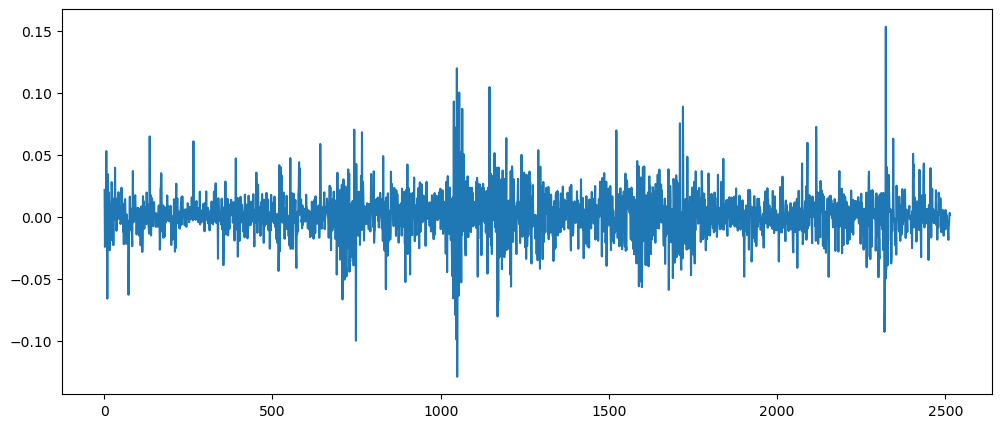

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

In [25]:
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
0,2016-01-13,21.958422,22.815204,21.938130,22.619046,249758400,NaN,NaN,NaN
1,2016-01-14,22.438665,22.655117,21.586393,22.086934,252680400,NaN,NaN,0.021871
2,2016-01-15,21.899799,22.030572,21.500720,21.690113,319335600,NaN,NaN,-0.024015
3,2016-01-19,21.793833,22.242516,21.532288,22.188404,212350800,NaN,NaN,-0.004839
4,2016-01-20,21.823145,22.138802,21.063314,21.442102,289337600,NaN,NaN,0.001345


### Data PreProcessing

In [26]:
df.shape

(2515, 9)

In [27]:
# Splitting data into training & testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

print(data_training)
print(data_testing)

           Close
0      21.958422
1      22.438665
2      21.899799
3      21.793833
4      21.823145
...          ...
1755  123.211197
1756  124.482033
1757  123.161942
1758  127.693573
1759  128.215729

[1760 rows x 1 columns]
           Close
1760  128.787094
1761  131.506058
1762  131.427261
1763  132.757187
1764  133.919647
...          ...
2510  260.329987
2511  259.040009
2512  259.369995
2513  260.250000
2514  260.690002

[755 rows x 1 columns]


In [28]:
# Data Scaling between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00858993],
       [0.01163588],
       [0.00821811],
       ...,
       [0.65047437],
       [0.67921629],
       [0.68252807]])

In [30]:
type(data_training_array)

numpy.ndarray

In [31]:
data_training_array.shape

(1760, 1)

### Sequence Creation

In [32]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]): 
    # ivde eg: range(100, 1759): (so total iteration 1759 - 100 = 1659 samples)
    x_train.append(data_training_array[i-100: i])
    # eg: starting(i = 100), ivde x_train lek data_training_array yile (0, 100) rows values append cheyyum
    y_train.append(data_training_array[i,0])
    # ivde y_train lek data_training_array yile (row 100, column 0 ) yile value append cheyyum, here 0 means first column
x_train, y_train = np.array(x_train), np.array(y_train)
    # here it converted to numpy array

In [33]:
x_train.shape
# it is 3D array

(1660, 100, 1)

In [34]:
x_train

array([[[0.00858993],
        [0.01163588],
        [0.00821811],
        ...,
        [0.01067555],
        [0.01096482],
        [0.01199191]],

       [[0.01163588],
        [0.00821811],
        [0.00754602],
        ...,
        [0.01096482],
        [0.01199191],
        [0.01257057]],

       [[0.00821811],
        [0.00754602],
        [0.00773193],
        ...,
        [0.01199191],
        [0.01257057],
        [0.01244035]],

       ...,

       [[0.94286117],
        [0.94966048],
        [0.9486624 ],
        ...,
        [0.68115323],
        [0.65078677],
        [0.65884707]],

       [[0.94966048],
        [0.9486624 ],
        [0.95814394],
        ...,
        [0.65078677],
        [0.65884707],
        [0.65047437]],

       [[0.9486624 ],
        [0.95814394],
        [0.95564868],
        ...,
        [0.65884707],
        [0.65047437],
        [0.67921629]]])

In [35]:
y_train.shape
# it is 1D array

(1660,)

In [36]:
y_train

array([0.01257057, 0.01244035, 0.01346743, ..., 0.65047437, 0.67921629,
       0.68252807])

### Model Building

In [37]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [38]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

### Model Training

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - loss: 0.0140
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - loss: 6.6056e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - loss: 6.1569e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 263ms/step - loss: 6.2109e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - loss: 7.2485e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - loss: 6.1717e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - loss: 5.2108e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - loss: 5.6670e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 5.2683e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 5.1454e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 4.9150e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 5.0565e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 4.3422e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - loss: 4.9319e-04

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [41]:
# save the trained model
model.save('final_stock_prediction_model.keras')

### Preparing test data

In [42]:
data_training

,Close
0,21.958422
1,22.438665
2,21.899799
3,21.793833
4,21.823145
...,...
1755,123.211197
1756,124.482033
1757,123.161942
1758,127.693573


In [43]:
data_testing

,Close
1760,128.787094
1761,131.506058
1762,131.427261
1763,132.757187
1764,133.919647
...,...
2510,260.329987
2511,259.040009
2512,259.369995
2513,260.250000


In [44]:
past_100_days = data_training.tail(100)
past_100_days

,Close
1660,171.671051
1661,171.277634
1662,168.691040
1663,164.806198
1664,164.471802
...,...
1755,123.211197
1756,124.482033
1757,123.161942
1758,127.693573


In [45]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

,Close
0,171.671051
1,171.277634
2,168.691040
3,164.806198
4,164.471802
...,...
850,260.329987
851,259.040009
852,259.369995
853,260.250000


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.97550675e-01],
       [2.95137487e-01],
       [2.79271545e-01],
       [2.55442262e-01],
       [2.53391103e-01],
       [2.55200784e-01],
       [2.70282577e-01],
       [2.31612884e-01],
       [2.18099294e-01],
       [2.03198609e-01],
       [1.93003000e-01],
       [1.97467533e-01],
       [1.84496987e-01],
       [1.76775122e-01],
       [1.85401968e-01],
       [1.76352910e-01],
       [1.93908167e-01],
       [2.30466332e-01],
       [1.72612623e-01],
       [1.81480759e-01],
       [1.63744300e-01],
       [1.53669804e-01],
       [1.76473369e-01],
       [1.91072861e-01],
       [1.71888751e-01],
       [1.65976567e-01],
       [1.52040952e-01],
       [1.54092204e-01],
       [1.60064476e-01],
       [1.48481399e-01],
       [1.04080537e-01],
       [7.82605578e-02],
       [1.03899709e-01],
       [1.25919219e-01],
       [1.27728899e-01],
       [1.21877178e-01],
       [8.96622463e-02],
       [9.16533160e-02],
       [8.29659141e-02],
       [7.91048882e-02],


In [47]:
input_data.shape

(855, 1)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [49]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [50]:
x_test.shape

(755, 100, 1)

In [51]:
y_test.shape

(755,)

### Making Prediction

In [52]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


In [53]:
y_predicted

array([[0.02612696],
       [0.03324553],
       [0.04345884],
       [0.05090127],
       [0.05775631],
       [0.06443256],
       [0.06703938],
       [0.06765738],
       [0.07301176],
       [0.08475811],
       [0.09722397],
       [0.10385916],
       [0.11128214],
       [0.12054515],
       [0.11979736],
       [0.11985624],
       [0.12260836],
       [0.13775599],
       [0.15917577],
       [0.16683672],
       [0.17546147],
       [0.1734897 ],
       [0.16716504],
       [0.16325612],
       [0.1685903 ],
       [0.17224152],
       [0.17970526],
       [0.18081674],
       [0.17718329],
       [0.163684  ],
       [0.15480648],
       [0.15169962],
       [0.14465378],
       [0.14279088],
       [0.1416734 ],
       [0.13624339],
       [0.13352299],
       [0.14482605],
       [0.16194376],
       [0.16810724],
       [0.17236078],
       [0.16832392],
       [0.15867767],
       [0.15648323],
       [0.16202149],
       [0.16821355],
       [0.17951337],
       [0.185

In [54]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [55]:
y_predicted

array([127.42137, 128.5819 , 130.24695, 131.46028, 132.57784, 133.66626,
       134.09123, 134.192  , 135.06491, 136.97989, 139.01218, 140.0939 ,
       141.30406, 142.81418, 142.69228, 142.70187, 143.15054, 145.62003,
       149.11206, 150.36101, 151.76709, 151.44563, 150.41454, 149.77727,
       150.6469 , 151.24214, 152.45894, 152.64015, 152.04779, 149.84703,
       148.39975, 147.89323, 146.74457, 146.44087, 146.25868, 145.37344,
       144.92993, 146.77264, 149.56332, 150.56815, 151.26158, 150.60347,
       149.03085, 148.6731 , 149.57599, 150.58546, 152.42766, 153.34953,
       154.70161, 156.35655, 156.72142, 157.11276, 157.88051, 157.51314,
       156.80374, 157.69012, 159.22394, 161.38725, 163.30875, 164.05682,
       163.33911, 163.0383 , 161.71745, 160.26353, 159.14233, 161.0658 ,
       162.61253, 163.45865, 164.35104, 165.34752, 165.41313, 164.48622,
       163.91884, 162.9428 , 162.35223, 164.26038, 166.39854, 167.59258,
       167.54378, 166.73227, 165.34271, 168.14674, 

In [56]:
y_test

array([128.78709412, 131.50605774, 131.42726135, 132.75718689,
       133.91964722, 133.20051575, 133.2596283 , 135.82098389,
       139.0128479 , 140.41171265, 139.75167847, 141.82048035,
       143.76118469, 140.87472534, 142.14555359, 143.26861572,
       148.57852173, 152.20379639, 149.47494507, 152.35160828,
       149.66217041, 148.62774658, 148.99279785, 151.79490662,
       151.15356445, 153.25509644, 151.6567688 , 150.51226807,
       146.49661255, 146.92089844, 147.40431213, 144.75027466,
       145.9440918 , 145.44091797, 143.36898804, 143.96095276,
       149.01255798, 151.77514648, 149.57493591, 150.82798767,
       148.57843018, 146.51637268, 148.46005249, 150.55169678,
       150.94636536, 153.76815796, 152.92951965, 155.29747009,
       157.15232849, 155.72172546, 156.80702209, 158.10939026,
       156.16572571, 155.54412842, 158.62243652, 160.19122314,
       162.69728088, 163.95030212, 163.41752625, 161.57250977,
       162.460495  , 159.86564636, 158.65206909, 157.96

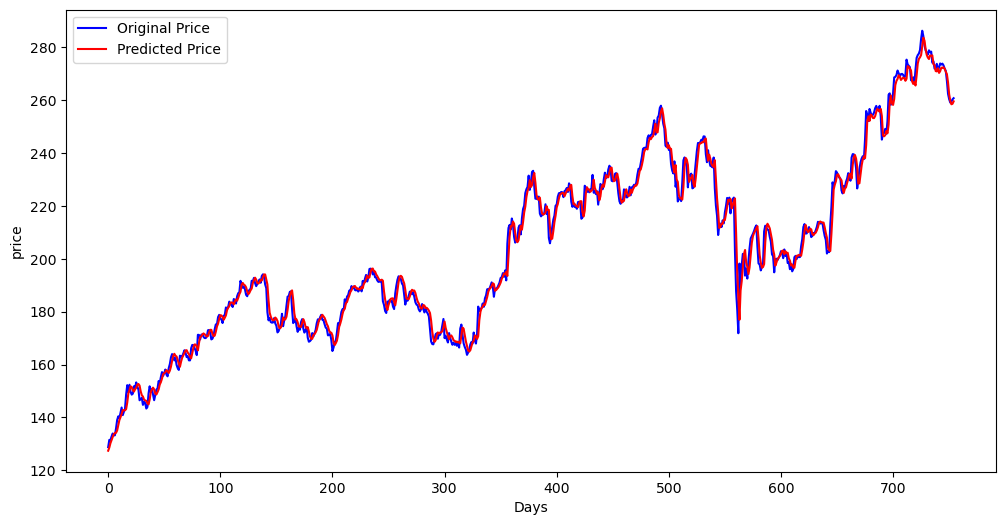

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend()

(140.0, 280.0)

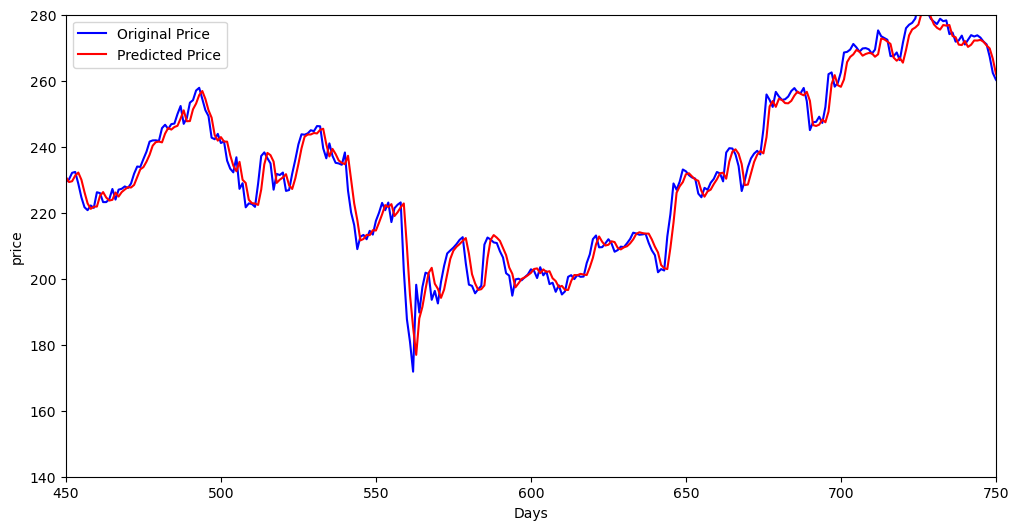

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Days')
plt.ylabel('price')
plt.legend()
plt.xlim(450,750)
plt.ylim(140, 280)

### Model Evaluation

In [59]:
# MSE
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 12.6983501428325


In [61]:
# RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (MSE): {rmse}")

Root Mean Squared Error (MSE): 3.5634744481801044


In [62]:
# R^2 value
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9891866015399484
